# BI8040 - notebook project - Eirini & Vasundra

## Model of interest: Mammalian cell cycle
Based on the following publication: [Logical model specification aided by model-checking techniques: application to the mammalian cell cycle regulation](https://doi.org/10.1093/bioinformatics/btw457)


In [ ]:
import ginsim 
import biolqm
import maboss
import pypint
from colomoto_jupyter import tabulate
from itertools import combinations
import matplotlib.pyplot as plt

In [ ]:
lrg = ginsim.load("http://ginsim.org/sites/default/files/Traynard_MultiLevel_MamCC_Apr2016.zginml")

In [ ]:
ginsim.show(lrg)

### Identification of stable state (asynchronous) - BIOLQM

1) Wild-type model

In [ ]:
lqm = ginsim.to_biolqm(lrg)
fixpoints = biolqm.fixpoints(lqm)
tabulate(fixpoints)

ginsim.show(lrg, fixpoints[0])

In [ ]:
ginsim.show(lrg, fixpoints[1])

Add trap space analysis to find cycle attractors

In [ ]:
traps = biolqm.trapspace(lqm)
tabulate(traps)

2) Perturbations

We generate here the perturbations from the paper
Ectopic means: force the node to be at 1

First example shows how to do one perturbation. 
Then we automatized the process by providing the list of perturbations to test.

In [ ]:
ectopic_cyce = biolqm.perturbation(lqm,"CycE%1")
tabulate(biolqm.fixpoints(ectopic_cyce))

Below is the list of perturbations to test made suitable for BIOLQM:

In [ ]:
perturbations = ["CycE%1", 
                 "p27%1", 
                 "p27% CycA%1", 
                 "p27%1 CycE%1", 
                 "p27%1 E2F%1",
                 "Rb%2", "Cdh1%0", 
                 "Rb%0", 
                 "Rb%0 E2F%1", 
                 "E2F%1 Rb%1 CycE:Rb%0 CycA:Rb%0", 
                 "CycE%0 CycA%0", 
                 "UbcH10%0", 
                 "Rb%1 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "Skp2%0", 
                 "Skp2%0 p27%0", 
                 "Skp2%1 Rb%2 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0", 
                 "Rb%1 p27%0 E2F:Rb%0 CycE:Rb%0 CycA:Rb%0"]

fixpointlist = {}
for p in perturbations:
    fixpoints = biolqm.fixpoints(biolqm.perturbation(lqm, p))
    fixpointlist[p] = fixpoints
    
'''for k, v in fixpointlist.items():
    print(k, display(tabulate(v)))'''

In [ ]:
'''List of perturbations with the nb of stable states '''
perturbstates=[]

'''List of table state values same order as perturbStates, with '''
stablestates = [] 

'''Node of nodes'''
nodelist = ['CycD', 'Rb', 'E2F', 'CycE', 'CycA', 'CycB', 'p27', 'Cdc20', 'Cdh1', 'UbcH10', 'Skp2']

for k,v in fixpointlist.items():   
    if not v:
        print('No Stable state found for: ', k)
    for i in range(0,len(v)):
        listSS = []
        for key, val in v[i].items():
            listSS.append(val)
        stablestates.append(listSS)
        perturbstates.append(str(k)+' '+str(i))

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame

In [ ]:
'''Create dataframe from the different lists above: columns = nodes, rows = perturbations SS'''
df = DataFrame(data=stablestates)
df.columns = nodelist
df.index = perturbstates

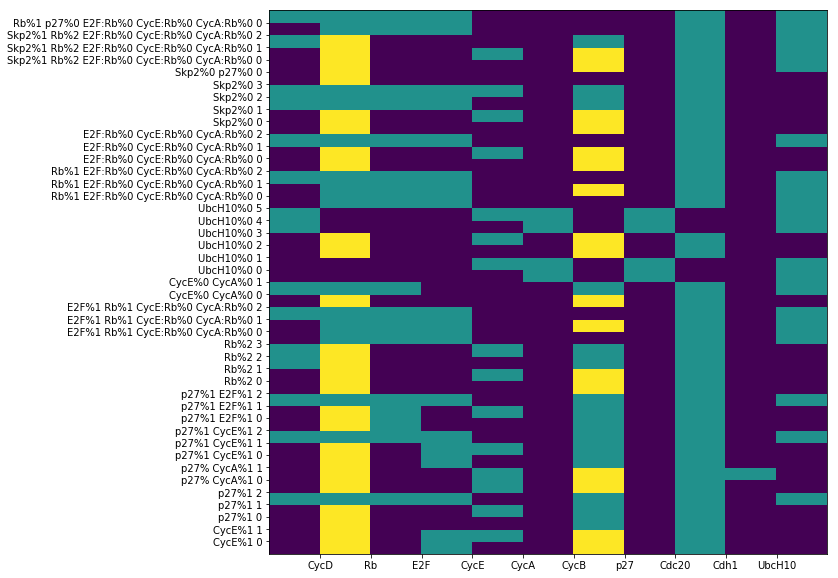

In [17]:
mpl.rcParams['figure.figsize'] = (10,10)
plt.pcolor(df)
plt.yticks(np.arange(1, len(df.index), 1), df.index)
plt.xticks(np.arange(1, len(df.columns), 1), df.columns)
plt.show()

TODO: Dendrogram, using seaborn? This will cluster the phenotypes.

### MODEL CHECKING

In [ ]:
from colomoto.temporal_logics import *

In [ ]:
initial_state = S(CycE=0, CycA=0, CycB=0)

In [ ]:
smv = ginsim.to_nusmv(lrg)

In [ ]:
sequence = E[(initial_state) U (S(CycE=1, CycA=0, CycB=0) & E[S(CycE=1, CycA=0, CycB=0)])]

In [ ]:
 U (S(CycE=1, CycA=1, CycB=0)) U 
   (S(CycE=0, CycA=1, CycB=0)) U (S(CycE=0, CycA=1, CycB=1)) U (S(CycE=0, CycA=0, CycB=1)) U (S(CycE=0, CycA=0, CycB=0))

In [ ]:
transient_apoptosis = {EF(S(CycE=0, CycA=0, CycB=0))} U {EF(S(CycE=0, CycA=0, CycB=0))}